In [458]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re


In [459]:
df=pd.read_csv("Daraz Labelled Review.csv")
df

,Unnamed: 0,Product_ID,Customer_Name,Customer_ID,Date,Rating,Reviews,Sentiment,Features,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,0,TE111EL1KXNGWNAFAMZ,itzmr7,6702,11/9/2019,1,mil gya hai acha hai aur toota howa b nai hai,Positive,['toota'],NaN,NaN,NaN,NaN,NaN,NaN
1,1,MI543EL02ACXSNAFAMZ,Afridi,396,11/21/2016,5,aram sy pocket may aa jta hai aur quality b ac...,Positive,"['aram', 'pocket', 'quality']",NaN,NaN,NaN,NaN,NaN,NaN
2,2,MI543EL02ACXSNAFAMZ,Muhammed,3710,10/22/2018,2,sb sy achi chez apki customer service bhot ach...,Positive,"['customer', 'products', 'orignal']",NaN,NaN,NaN,NaN,NaN,NaN
3,3,TE111EL1KXNGWNAFAMZ,Ghazanfar,1860,10/6/2017,3,back cover acha hai sai cuts hai aur soft b ha...,Positive,"['back', 'cover', 'cuts', 'soft', 'protector',...",NaN,NaN,NaN,NaN,NaN,NaN
4,4,SO638EL103OUWNAFAMZ,Murtaza iqbal,3778,8/31/2017,4,shru may may thumb grip k khalif thi kyu k ext...,Negative,"['thumb', 'grip', 'chezy', 'stock', 'controlle...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3918,3918,HA779HL1JDA5CNAFAMZ,Az,1157,7/31/2019,3,tasweer isi terhan tha jaisay tasweer aur tars...,Positive,"['tasweer', 'tasweer', 'haftay', 'takheer', 'm...",NaN,NaN,NaN,NaN,NaN,NaN
3919,3919,HA779HL1JDA5CNAFAMZ,Zeeshan,6135,9/25/2016,5,waqt par masool hwa aaccha lagta hai mein iss ...,Neutral,"['waqt', 'masool', 'miyaar']",NaN,NaN,NaN,NaN,NaN,NaN
3920,3920,HA779HL1JDA5CNAFAMZ,shan,7218,4/13/2018,3,masnoaat isi terhan ki thi jaisay website par ...,Positive,"['masnoaat', 'website', 'asal', 'tasweer', 'da...",NaN,NaN,NaN,NaN,NaN,NaN
3921,3921,HA779HL1JDA5CNAFAMZ,Hafiz Ali Haider,1954,3/24/2018,5,mein nai iss ac ko hbl shop festa se khareeda ...,Negative,"['ac', 'din', 'haalat', 'ac', 'mukammal', 'pik...",NaN,NaN,NaN,NaN,NaN,NaN


In [460]:
df.shape


(3923, 15)

In [461]:
df.isnull().sum()

Unnamed: 0          0
Product_ID          0
Customer_Name       0
Customer_ID         0
Date                0
Rating              0
Reviews             0
Sentiment           0
Features            0
Unnamed: 9       3923
Unnamed: 10      3923
Unnamed: 11      3923
Unnamed: 12      3923
Unnamed: 13      3923
Unnamed: 14      3923
dtype: int64

In [462]:
df.drop(["Unnamed: 0","Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12","Unnamed: 13","Unnamed: 14"],axis=1,inplace=True)

In [463]:
df

,Product_ID,Customer_Name,Customer_ID,Date,Rating,Reviews,Sentiment,Features
0,TE111EL1KXNGWNAFAMZ,itzmr7,6702,11/9/2019,1,mil gya hai acha hai aur toota howa b nai hai,Positive,['toota']
1,MI543EL02ACXSNAFAMZ,Afridi,396,11/21/2016,5,aram sy pocket may aa jta hai aur quality b ac...,Positive,"['aram', 'pocket', 'quality']"
2,MI543EL02ACXSNAFAMZ,Muhammed,3710,10/22/2018,2,sb sy achi chez apki customer service bhot ach...,Positive,"['customer', 'products', 'orignal']"
3,TE111EL1KXNGWNAFAMZ,Ghazanfar,1860,10/6/2017,3,back cover acha hai sai cuts hai aur soft b ha...,Positive,"['back', 'cover', 'cuts', 'soft', 'protector',..."
4,SO638EL103OUWNAFAMZ,Murtaza iqbal,3778,8/31/2017,4,shru may may thumb grip k khalif thi kyu k ext...,Negative,"['thumb', 'grip', 'chezy', 'stock', 'controlle..."
...,...,...,...,...,...,...,...,...
3918,HA779HL1JDA5CNAFAMZ,Az,1157,7/31/2019,3,tasweer isi terhan tha jaisay tasweer aur tars...,Positive,"['tasweer', 'tasweer', 'haftay', 'takheer', 'm..."
3919,HA779HL1JDA5CNAFAMZ,Zeeshan,6135,9/25/2016,5,waqt par masool hwa aaccha lagta hai mein iss ...,Neutral,"['waqt', 'masool', 'miyaar']"
3920,HA779HL1JDA5CNAFAMZ,shan,7218,4/13/2018,3,masnoaat isi terhan ki thi jaisay website par ...,Positive,"['masnoaat', 'website', 'asal', 'tasweer', 'da..."
3921,HA779HL1JDA5CNAFAMZ,Hafiz Ali Haider,1954,3/24/2018,5,mein nai iss ac ko hbl shop festa se khareeda ...,Negative,"['ac', 'din', 'haalat', 'ac', 'mukammal', 'pik..."


In [464]:
df.describe()

,Customer_ID,Rating
count,3923.000000,3923.000000
mean,3657.730308,3.930665
std,2209.149883,1.414497
min,0.000000,1.000000
25%,1716.500000,3.000000
50%,3613.000000,5.000000
75%,5538.000000,5.000000
max,9596.000000,5.000000


In [465]:
df.drop(["Product_ID","Customer_Name","Date","Features"],axis=1,inplace=True)

In [466]:
df

,Customer_ID,Rating,Reviews,Sentiment
0,6702,1,mil gya hai acha hai aur toota howa b nai hai,Positive
1,396,5,aram sy pocket may aa jta hai aur quality b ac...,Positive
2,3710,2,sb sy achi chez apki customer service bhot ach...,Positive
3,1860,3,back cover acha hai sai cuts hai aur soft b ha...,Positive
4,3778,4,shru may may thumb grip k khalif thi kyu k ext...,Negative
...,...,...,...,...
3918,1157,3,tasweer isi terhan tha jaisay tasweer aur tars...,Positive
3919,6135,5,waqt par masool hwa aaccha lagta hai mein iss ...,Neutral
3920,7218,3,masnoaat isi terhan ki thi jaisay website par ...,Positive
3921,1954,5,mein nai iss ac ko hbl shop festa se khareeda ...,Negative


In [467]:
example=df['Reviews'][50]
print(example)

ya kaafi faydy mad h mry lya kaafi achi device hai


In [468]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
token=word_tokenize(example)
token

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['ya',
 'kaafi',
 'faydy',
 'mad',
 'h',
 'mry',
 'lya',
 'kaafi',
 'achi',
 'device',
 'hai']

In [469]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
tage=nltk.pos_tag(token)
tage[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ACT\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('ya', 'NN'),
 ('kaafi', 'VB'),
 ('faydy', 'JJ'),
 ('mad', 'JJ'),
 ('h', 'NN'),
 ('mry', 'NN'),
 ('lya', 'NN'),
 ('kaafi', 'FW'),
 ('achi', 'JJ'),
 ('device', 'NN')]

In [470]:
#vader sentiment scoring 

In [471]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ACT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [472]:
sia.polarity_scores('I am big fan of you !')

{'neg': 0.0, 'neu': 0.607, 'pos': 0.393, 'compound': 0.3802}

In [473]:
sia.polarity_scores('I hate you')

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [474]:
#run the polarity score in data set

In [475]:
df

,Customer_ID,Rating,Reviews,Sentiment
0,6702,1,mil gya hai acha hai aur toota howa b nai hai,Positive
1,396,5,aram sy pocket may aa jta hai aur quality b ac...,Positive
2,3710,2,sb sy achi chez apki customer service bhot ach...,Positive
3,1860,3,back cover acha hai sai cuts hai aur soft b ha...,Positive
4,3778,4,shru may may thumb grip k khalif thi kyu k ext...,Negative
...,...,...,...,...
3918,1157,3,tasweer isi terhan tha jaisay tasweer aur tars...,Positive
3919,6135,5,waqt par masool hwa aaccha lagta hai mein iss ...,Neutral
3920,7218,3,masnoaat isi terhan ki thi jaisay website par ...,Positive
3921,1954,5,mein nai iss ac ko hbl shop festa se khareeda ...,Negative


In [476]:
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

all_stopwords=stopwords.words("english")
all_stopwords.remove("not")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [477]:
corpus=[]
for i in range(0,3923):
    review=re.sub('[^a-zA-Z]'," ",data["Reviews"][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word)for word in review if not word in set(all_stopwords) ]
    review=" ".join(review)
    corpus.append(review)

In [478]:
corpus

['mil gya hai acha hai aur toota howa b nai hai',
 'aram sy pocket may aa jta hai aur qualiti b achi hai',
 'sb sy achi chez apki custom servic bhot achi hai aur product b orign hai',
 'back cover acha hai sai cut hai aur soft b hai kaafi acha hai lakin protector chota hai size may khaa tor b width may lakin touch sai kaam kar rha hai isi hi tarha sensor b sb kuch thek hai aur combin b acha hai',
 'shru may may thumb grip k khalif thi kyu k extra chezi add kar deti thi lakin jb sy meri stock control ki rubber wire kharab hona churu hoei may ny inn grip ko khare aur may bhot kush ho pair ko istemail kar k ko istema karna bhot asan hai aur mujhi lagta h inn ko istema kar k may acha game khelni wala ban gya ho inn ki qualiti inn ko acha banati hai aur asan h istema may',
 'may ny ya lya kyu k ya madad karti h acha karni may jb game khelo race wali may ny new nf ki game liii hai tu meri dost ny bola k tm ya khare lo iss sy achi tarha game khel lo gi tu phr may ny ya ka ka pack liay lya ya 

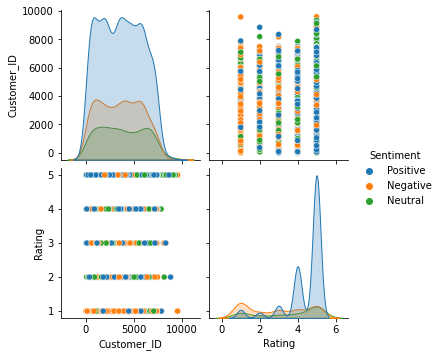

In [479]:
sns.pairplot(df,hue='Sentiment')

<AxesSubplot:>

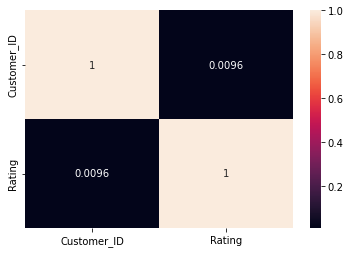

In [481]:
sns.heatmap(df.corr(),annot=True)

In [482]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [484]:
x=df.drop('Sentiment', axis=1)
print(x)

      Customer_ID  Rating                                            Reviews
0            6702       1      mil gya hai acha hai aur toota howa b nai hai
1             396       5  aram sy pocket may aa jta hai aur quality b ac...
2            3710       2  sb sy achi chez apki customer service bhot ach...
3            1860       3  back cover acha hai sai cuts hai aur soft b ha...
4            3778       4  shru may may thumb grip k khalif thi kyu k ext...
...           ...     ...                                                ...
3918         1157       3  tasweer isi terhan tha jaisay tasweer aur tars...
3919         6135       5  waqt par masool hwa aaccha lagta hai mein iss ...
3920         7218       3  masnoaat isi terhan ki thi jaisay website par ...
3921         1954       5  mein nai iss ac ko hbl shop festa se khareeda ...
3922         1800       1  aik puranay model bheja gaya tha jo ab bazaar ...

[3923 rows x 3 columns]


In [485]:
x.isnull().sum()

Customer_ID    0
Rating         0
Reviews        0
dtype: int64

In [486]:
y=df.iloc[:,-1].values
y

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Negative',
       'Positive'], dtype=object)

In [491]:
x=tfidf.fit_transform(corpus).toarray()

In [492]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0)

In [493]:
#Model fitting 

In [494]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb.fit(xtrain,ytrain)

GaussianNB()

In [495]:
y_pre=gnb.predict(xtest)
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(ytest,y_pre)
print(cm)
print(accuracy_score(ytest,y_pre))


[[139  39 113]
 [ 49  69  40]
 [242 177 309]]
0.4392523364485981


In [496]:

mnb.fit(xtrain,ytrain)
y_pre1=mnb.predict(xtest)
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(ytest,y_pre1)
print(cm)
print(accuracy_score(ytest,y_pre1))

[[ 26   0 265]
 [  2   1 155]
 [  0   0 728]]
0.6414613423959218


In [497]:
bnb.fit(xtrain,ytrain)
y_pre2=bnb.predict(xtest)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
cm=confusion_matrix(ytest,y_pre2)
print(cm)
print(accuracy_score(ytest,y_pre2))


[[121  14 156]
 [ 13  16 129]
 [ 70  10 648]]
0.6669498725573492


In [498]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [499]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [500]:

#Dictionary 
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    
}

In [501]:
def train_classifier(clf,xtrain,ytrain,xtest,ytest):
    clf.fit(xtrain,ytrain)
    y_pred = clf.predict(xtest)
    accuracy = accuracy_score(ytest,y_pred)
    
    return accuracy

In [502]:
accuracy_scores = []

for name,clf in clfs.items():
    
    current_accuracy = train_classifier(clf, xtrain,ytrain,xtest,ytest)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    
    accuracy_scores.append(current_accuracy)

For  SVC
Accuracy -  0.7612574341546304
For  KN
Accuracy -  0.6762956669498725
For  NB
Accuracy -  0.6414613423959218
For  DT
Accuracy -  0.6117247238742566
For  LR
Accuracy -  0.7451146983857264
For  RF
Accuracy -  0.72982158028887
For  AdaBoost
Accuracy -  0.7170773152081563
For  BgC
Accuracy -  0.7247238742565846
For  ETC
Accuracy -  0.719626168224299
For  GBDT
Accuracy -  0.7085811384876806


In [503]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy',ascending=False)


In [504]:
performance_df

,Algorithm,Accuracy
0,SVC,0.761257
4,LR,0.745115
5,RF,0.729822
7,BgC,0.724724
8,ETC,0.719626
6,AdaBoost,0.717077
9,GBDT,0.708581
1,KN,0.676296
2,NB,0.641461
3,DT,0.611725


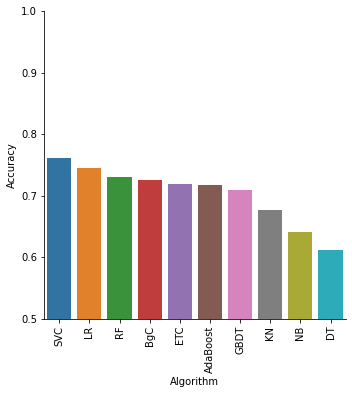

In [505]:
sns.catplot(x = 'Algorithm', y='Accuracy', 
               data=performance_df, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()